In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<h1>Configuration Stuff Here</h1>

In [2]:
ifSave = True
savePath = "../plot_files/28Feb2024_m240_swap_cut_order/"

In [3]:
ifCut = True

In [4]:
ifTune = True

TuneCut = {
    'crumbs': 0 #0.14
    , 'Muon' : 0.04
    , 'Proton' : 9.8 
    , 'Pion' : 0.8
    #, 'Opt0Score': 1550
    , 'Opt0FracMore': -0.2
    , 'Opt0FracLess': 0.68
    , 'OneShowerTheta': 18
    , 'TwoShowerTheta': 24
    }
    

<h1> Read in PKL Dataframe </h1>

<h3> HNL </h3>

In [5]:
df_hnl = pd.DataFrame()

for i in range(0, 5):
    hnl_path = "../pkl_files/v2/hnl_m240_50k_v2__slc_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    df_hnl = pd.concat((df_hnl, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_hnl = pd.DataFrame()

for i in range(0, 5):
    hnl_path = "../pkl_files/v2/hnl_m240_50k_v2__subrun_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_hnl = pd.concat((dfsubrun_hnl, df), ignore_index=True)
    file.close()

../pkl_files/v2/hnl_m240_50k_v2__slc_0.pkl
../pkl_files/v2/hnl_m240_50k_v2__slc_1.pkl
../pkl_files/v2/hnl_m240_50k_v2__slc_2.pkl
../pkl_files/v2/hnl_m240_50k_v2__slc_3.pkl
../pkl_files/v2/hnl_m240_50k_v2__slc_4.pkl
../pkl_files/v2/hnl_m240_50k_v2__subrun_0.pkl
../pkl_files/v2/hnl_m240_50k_v2__subrun_1.pkl
../pkl_files/v2/hnl_m240_50k_v2__subrun_2.pkl
../pkl_files/v2/hnl_m240_50k_v2__subrun_3.pkl
../pkl_files/v2/hnl_m240_50k_v2__subrun_4.pkl


<h3> TPC Neutrino </h3>

In [6]:
df_nu = pd.DataFrame()

for i in range(0, 10):
    nu_path = "../pkl_files/v2/nu_rockbox_100k_v2_slc_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    df_nu = pd.concat((df_nu, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_nu = pd.DataFrame()

for i in range(0, 10):
    nu_path = "../pkl_files/v2/nu_rockbox_100k_v2_subrun_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_nu = pd.concat((dfsubrun_nu, df), ignore_index=True)
    file.close()

../pkl_files/v2/nu_rockbox_100k_v2_slc_0.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_1.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_2.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_3.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_4.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_5.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_6.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_7.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_8.pkl
../pkl_files/v2/nu_rockbox_100k_v2_slc_9.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_0.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_1.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_2.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_3.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_4.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_5.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_6.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_7.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_8.pkl
../pkl_files/v2/nu_rockbox_100k_v2_subrun_9.pkl


<h3> Intime Cosmics </h3>

In [7]:
df_cos = pd.DataFrame()

for i in range(0, 5):
    cos_path = "../pkl_files/v2/intime_cosmics_50k_v2_slc_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    df_cos = pd.concat((df_cos, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_cos = pd.DataFrame()

for i in range(0, 5):
    cos_path = "../pkl_files/v2/intime_cosmics_50k_v2_subrun_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_cos = pd.concat((dfsubrun_cos, df), ignore_index=True)
    file.close()

../pkl_files/v2/intime_cosmics_50k_v2_slc_0.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_1.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_2.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_3.pkl
../pkl_files/v2/intime_cosmics_50k_v2_slc_4.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_0.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_1.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_2.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_3.pkl
../pkl_files/v2/intime_cosmics_50k_v2_subrun_4.pkl


<h1>Some Scaling Voodoo</h1>

<h3>HNL</h3>

In [8]:
true_signals = 6866 +6946 +7027 +7000 +6980
true_nonfv_signals = 2984 +3054 +2973 +3000 +3070
total_true_signals = 9850 +10000 +10000 +10000 +10050
start_signals = 6533 +6588 +6671 +6653 +6613
start_nonfv_signals = 2497 +2538 +2494 +2517 +2566
total_start_signals = 9030 +9126 +9165 +9170 +9179

In [9]:
#Sanity Check: ifScale == 1 i.e. Umu = 1e-7 and 3 years POT
#true counts ~1.5k
#start counts ~1.4k
scale_pot_hnl, hnl_spill = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = 1)

true_signals = true_signals * scale_pot_hnl
true_nonfv_signals = true_nonfv_signals * scale_pot_hnl
total_true_signals = total_true_signals * scale_pot_hnl
start_signals = start_signals * scale_pot_hnl
start_nonfv_signals = start_nonfv_signals * scale_pot_hnl
total_start_signals = total_start_signals * scale_pot_hnl

true_counts = total_true_signals
start_counts = total_start_signals
print("true counts = " + str(true_counts))
print("start counts = " + str(start_counts))

-----------------------------------------------
sample pot = 7.201995168666648e+21
sample spill = 49900
target spill = 6928.635583802857
scale pot factor = 0.13885041250105926
-----------------------------------------------
true counts = 6928.635583802857
start counts = 6341.298338923376


In [10]:
simU = 1e-7 #already squared
scaleHNLPlot = 17.2

In [11]:
plotU = getUfromScaleFactor(simU, scaleHNLPlot)
true_counts = true_counts * scaleHNLPlot
start_counts =  start_counts * scaleHNLPlot

print("Scale Umu by " + str(scaleHNLPlot))
print("Scaled Umu = " + str(plotU))
print("Scaled true counts = " + str(true_counts))
print("Scaled start counts = " + str(start_counts))

Scale Umu by 17.2
Scaled Umu = 4.147288270665544e-07
Scaled true counts = 119172.53204140913
Scaled start counts = 109070.33142948206


In [12]:
scale_pot_hnl, hnl_spill = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = scaleHNLPlot)

del dfsubrun_hnl

-----------------------------------------------
sample pot = 7.201995168666648e+21
sample spill = 49900
target spill = 6928.635583802857
scale pot factor = 2.388227095018219
-----------------------------------------------


<h3>Rock Box Neutrino</h3>

In [13]:
scale_pot_nu, nu_spill = calc_scaling_pot(dfsubrun_nu, df_nu)

del  dfsubrun_nu

-----------------------------------------------
sample pot = 8.872706052586226e+18
sample spill = 588300
target spill = 66304461.85338482
scale pot factor = 112.70518758012038
-----------------------------------------------


<h3>Intime Cosmics</h3>

In [14]:
scale_pot_cosmics = calc_scaling_spill(dfsubrun_cos, df_cos, hnl_spill, nu_spill)

del  dfsubrun_cos

-----------------------------------------------
target total spill = 200000000.0
hnl + nu spill = 66311390.488968626
target intime spill = 133688609.51103139
scale pot factor = 27.822811552764076
-----------------------------------------------


<h1> Make Beam Bucket - Pre Cosmics </h1>

<Figure size 432x288 with 0 Axes>

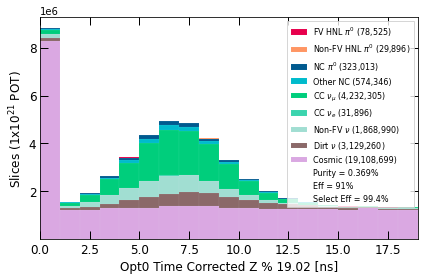

In [15]:
width = 19.02

df_hnl['mod_t'] = df_hnl['slc_opt0_time_corrected_Z_pandora']%width
df_nu['mod_t'] = df_nu['slc_opt0_time_corrected_Z_pandora']%width
df_cos['mod_t'] = df_cos['slc_opt0_time_corrected_Z_pandora']%width
#----------------------------------------------
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_precosmics.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Save Purity and Eff </h1>

In [16]:
purity_arr, eff_arr, cut_arr = [], [], []

In [17]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)


purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Clear Cosmics Removal")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4]
[99.4]
['Clear Cosmics Removal']


<h1> CRUMBS </h1>

<Figure size 432x288 with 0 Axes>

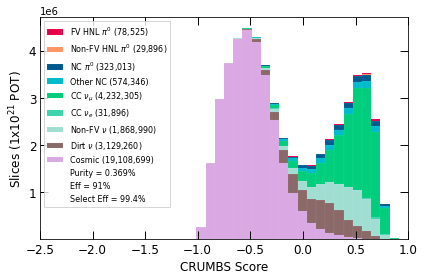

In [18]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_crumbs_score', 
                    scaleHNLPlot,
                    xmin = -2.5, xmax =1, xnbin = 40,
                    xtitle = 'CRUMBS Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"crumbs_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE = 0.1
Purity = 1.2
Eff = 86.6
Purity - Start Purity = 0.8
Eff - Start Eff = -12.8
-------------------------------------
Best Cut Score P = 0.74
Purity = 3.3
Eff = 7.1
Purity - Start Purity = 2.9
Eff - Start Eff = -92.3


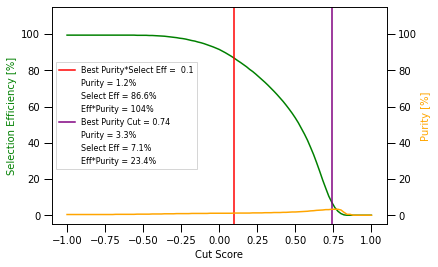

In [19]:
if ifTune:
    vary_crumbsScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    if ifSave:
        plt.savefig(savePath+"/crumbs_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [20]:
#score = TuneCut['crumbs']
score = 0.00
print(score)

if ifCut:
    df_hnl = cutCosmics(df_hnl, crumbsScore = score)
    df_nu = cutCosmics(df_nu, crumbsScore = score)
    df_cos = cutCosmics(df_cos, crumbsScore = score)

0.0


<h3>Save Purity/Eff</h3>

In [21]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("CRUMBS")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1]
[99.4, 91.5]
['Clear Cosmics Removal', 'CRUMBS']


<Figure size 432x288 with 0 Axes>

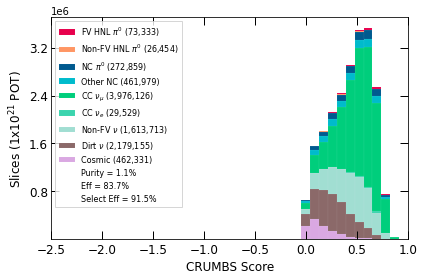

In [22]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_crumbs_score', 
                    scaleHNLPlot,
                    xmin = -2.5, xmax =1, xnbin = 40,
                    xtitle = 'CRUMBS Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"crumbs_postcut.png", dpi = 200)
#-----------------------------------#

plt.show()

<h1> Make Beam Bucket - Post Crumbs</h1>

<Figure size 432x288 with 0 Axes>

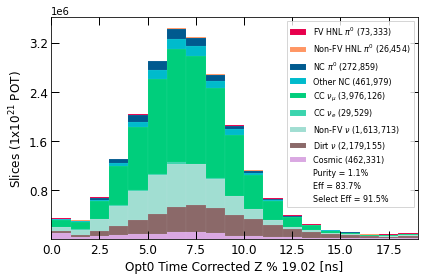

In [23]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postcrumbs.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Fiducial Volume </h1>

<Figure size 432x288 with 0 Axes>

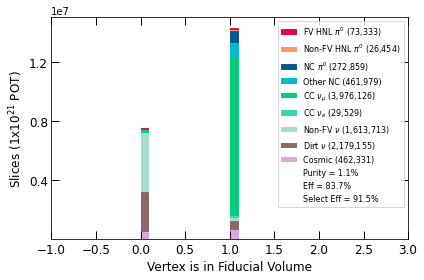

In [24]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_is_fv', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 3, xnbin = 40,
                    xtitle = 'Vertex is in Fiducial Volume'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"fv_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [25]:
if ifCut:
    df_hnl = cutFV(df_hnl)
    df_nu = cutFV(df_nu)
    df_cos = cutFV(df_cos)

<h3>Save Purity/Eff</h3>

In [26]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Vertex In FV")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1, 1.3]
[99.4, 91.5, 66.0]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV']


<Figure size 432x288 with 0 Axes>

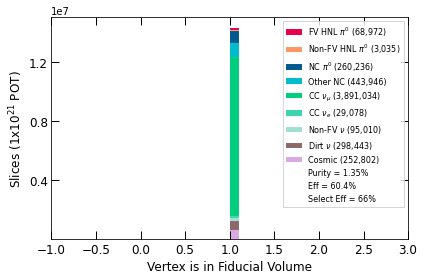

In [27]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_is_fv', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 3, xnbin = 40,
                    xtitle = 'Vertex is in Fiducial Volume'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"fv_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post FV</h1>

<Figure size 432x288 with 0 Axes>

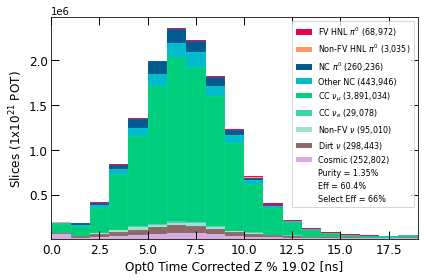

In [28]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postFV.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Muon Rejection</h1>

<Figure size 432x288 with 0 Axes>

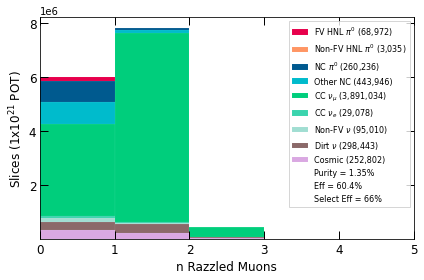

<Figure size 432x288 with 0 Axes>

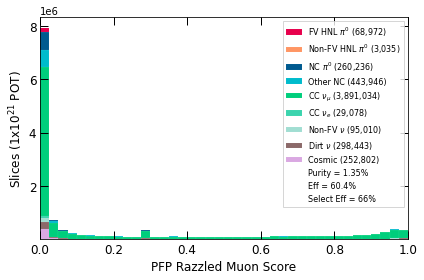

In [29]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_muons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Muons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_muon_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_muon_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Muon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_muon_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE = 0.04
Purity = 6.8
Eff = 50.8
Purity - Start Purity = 5.5
Eff - Start Eff = -15.2
-------------------------------------
Best Cut Score P = 0.02
Purity = 7.2
Eff = 41.6
Purity - Start Purity = 5.9
Eff - Start Eff = -24.4


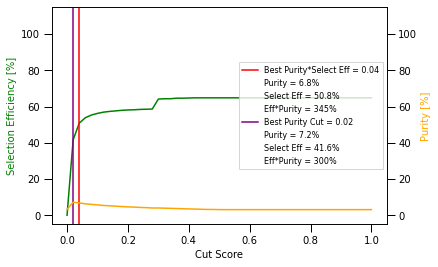

In [30]:
if ifTune:
    vary_MuonScore(df_hnl, df_nu, df_cos , true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/muon_tuning.png", dpi =200)

<h3> Apply Cut</h3>

In [31]:
#muonScore = TuneCut['Muon']
muonScore = 0.04
print(muonScore)

if ifCut:
    df_hnl = cutMuon(df_hnl, muonScore =muonScore)
    df_nu = cutMuon(df_nu, muonScore =muonScore)
    df_cos = cutMuon(df_cos,muonScore =muonScore)

0.04


<h3>Save Purity/Eff</h3>

In [32]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Muon Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1, 1.3, 6.8]
[99.4, 91.5, 66.0, 50.8]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut']


<Figure size 432x288 with 0 Axes>

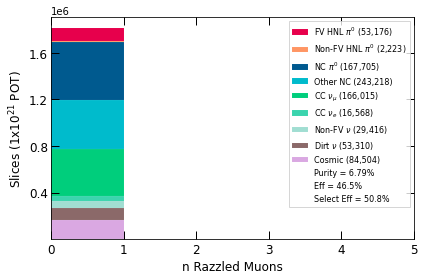

<Figure size 432x288 with 0 Axes>

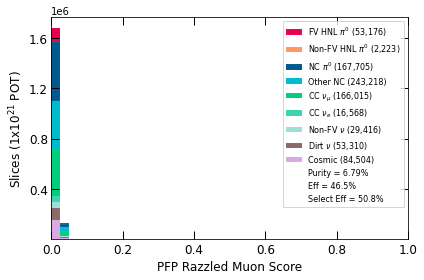

In [33]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_muons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Muons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_muon_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_muon_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Muon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_muon_score_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post Muon</h1>

<Figure size 432x288 with 0 Axes>

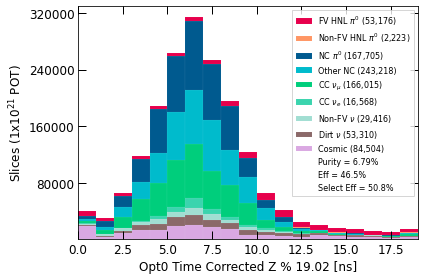

In [34]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postmuon.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Proton Rejection</h1>

<Figure size 432x288 with 0 Axes>

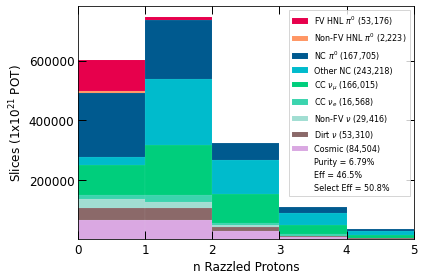

<Figure size 432x288 with 0 Axes>

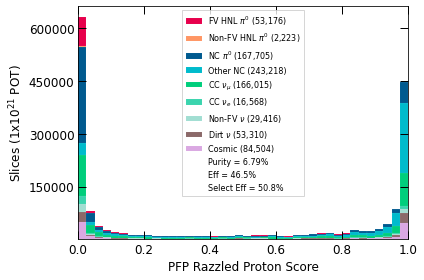

In [35]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_protons_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Protons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_proton_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_proton_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Proton Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_proton_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE =   1
Purity = 19.5
Eff = 47.9
Purity - Start Purity = 12.7
Eff - Start Eff = -2.9
-------------------------------------
Best Cut Score P = 0.02
Purity =  28
Eff = 28.2
Purity - Start Purity = 21.2
Eff - Start Eff = -22.6


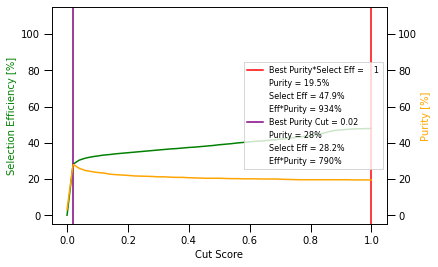

In [36]:
if ifTune:
    vary_ProtonScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/proton_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [37]:
#protonScore = TuneCut['Proton']
protonScore = 1
print(protonScore)

if ifCut:
    df_hnl = cutProton(df_hnl, nProton = 0, protonScore = protonScore)
    df_nu = cutProton(df_nu, nProton = 0, protonScore = protonScore)
    df_cos = cutProton(df_cos, nProton = 0, protonScore = protonScore)

1


<h3>Save Purity/Eff</h3>

In [38]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Proton Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1, 1.3, 6.8, 19.5]
[99.4, 91.5, 66.0, 50.8, 47.9]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut']


<Figure size 432x288 with 0 Axes>

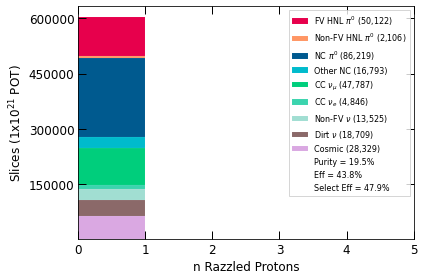

<Figure size 432x288 with 0 Axes>

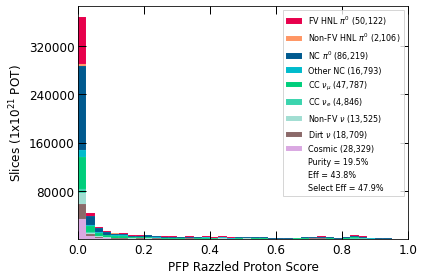

In [39]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_protons_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Protons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_proton_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_proton_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Proton Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_proton_score_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post Proton</h1>

<Figure size 432x288 with 0 Axes>

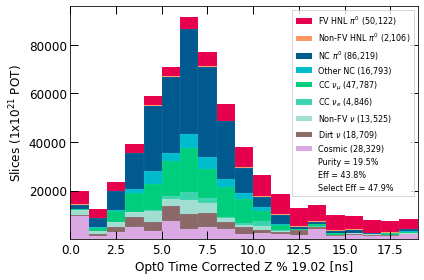

In [40]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postproton.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Pion Rejection</h1>

<Figure size 432x288 with 0 Axes>

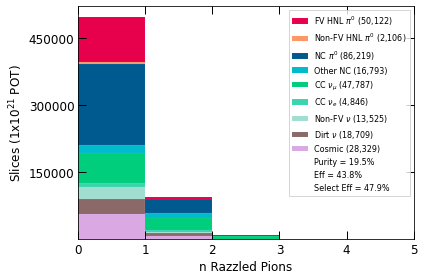

<Figure size 432x288 with 0 Axes>

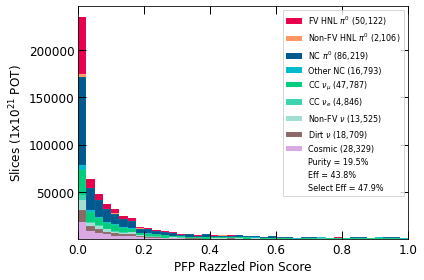

In [41]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_pions_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Pions'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_pion_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_pion_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Pion Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_pion_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE = 0.82
Purity = 22.5
Eff =  46
Purity - Start Purity =   3
Eff - Start Eff = -1.9
-------------------------------------
Best Cut Score P = 0.02
Purity = 39.2
Eff = 21.4
Purity - Start Purity = 19.7
Eff - Start Eff = -26.5


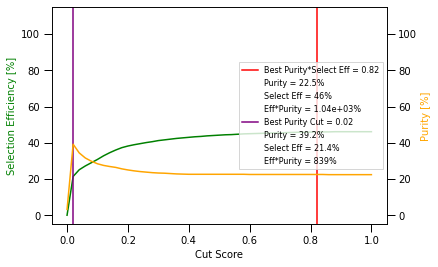

In [42]:
if ifTune:
    vary_PionScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/pion_tuning.png", dpi =200)

<h3>Apply Cut </h3>

In [43]:
#pionScore = TuneCut['Pion']
pionScore = 0.8
print(pionScore)

if ifCut:
    df_hnl = cutPion(df_hnl, nPion = 0, pionScore = pionScore)
    df_nu = cutPion(df_nu, nPion = 0, pionScore = pionScore)
    df_cos = cutPion(df_cos, nPion = 0, pionScore = pionScore)

0.8


<h3>Save Purity/Eff</h3>

In [44]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Pion Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1, 1.3, 6.8, 19.5, 22.5]
[99.4, 91.5, 66.0, 50.8, 47.9, 45.9]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut']


<Figure size 432x288 with 0 Axes>

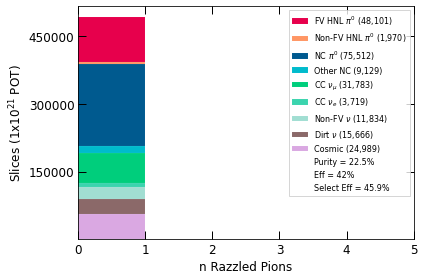

<Figure size 432x288 with 0 Axes>

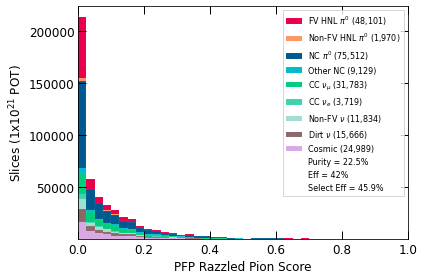

In [45]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_pions_thresh', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Pions'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_pion_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_pion_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Pion Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_pion_score_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post Pion</h1>

<Figure size 432x288 with 0 Axes>

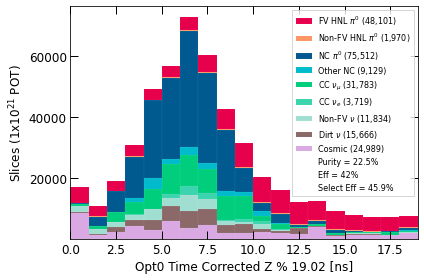

In [46]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postpion.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Electron Rejection (?)</h1>

<h3> All PFP Shower </h3>

<Figure size 432x288 with 0 Axes>

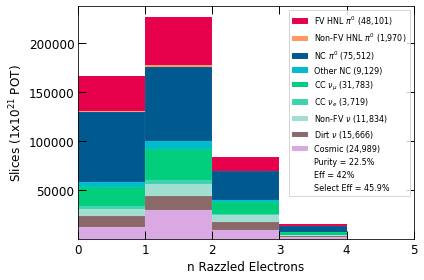

<Figure size 432x288 with 0 Axes>

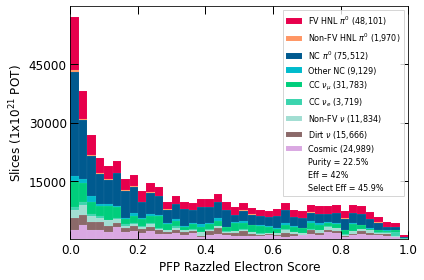

In [47]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_electrons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Electrons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_electron_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_electron_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Electron Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_electron_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Get Primary Shower </h3>

In [48]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Shower </h3>

<Figure size 432x288 with 0 Axes>

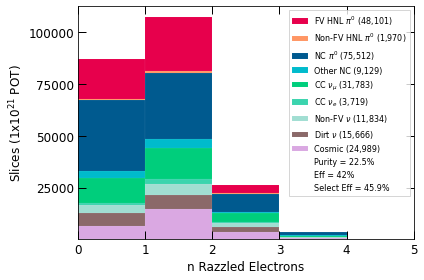

<Figure size 432x288 with 0 Axes>

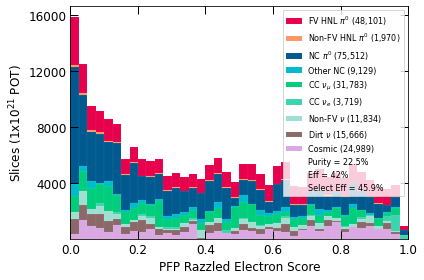

In [49]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_n_razzled_electrons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Electrons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_electron_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_electron_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Electron Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_electron_score_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Photon Selection (?)</h1>

<h3> All PFP Shower </h3>

<Figure size 432x288 with 0 Axes>

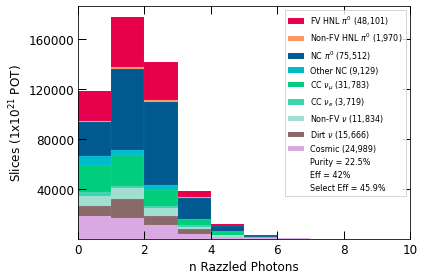

<Figure size 432x288 with 0 Axes>

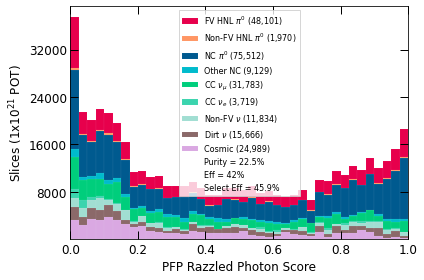

In [50]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_photons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Razzled Photons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_photon_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_photon_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Photon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_photon_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Primary Shower </h3>

<Figure size 432x288 with 0 Axes>

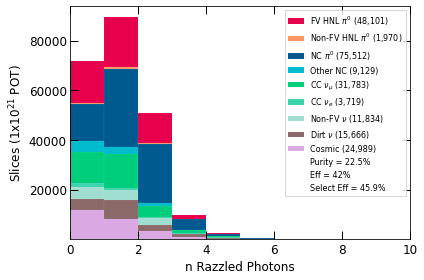

<Figure size 432x288 with 0 Axes>

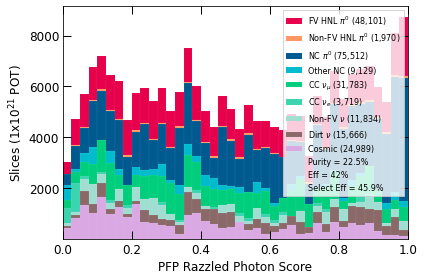

In [51]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_n_razzled_photons', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Razzled Photons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_photon_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_photon_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Photon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_photon_score_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Multiplicity</h1>

In [52]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<Figure size 432x288 with 0 Axes>

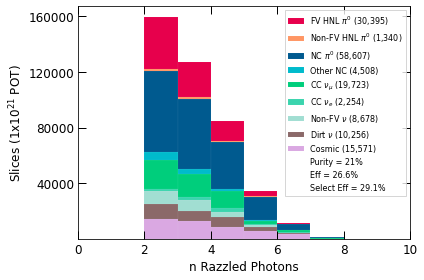

In [53]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
                    true_counts, start_counts, 
                    'n_pfp', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Razzled Photons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"npfp_two_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Opt0 Score </h1>

<Figure size 432x288 with 0 Axes>

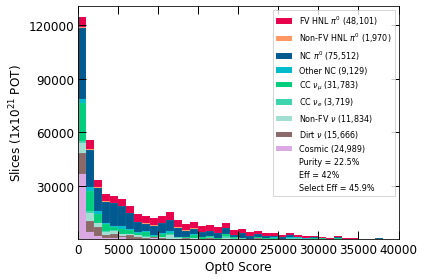

In [54]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_score', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 40000, xnbin = 40,
                    xtitle = 'Opt0 Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Apply Cut </h3>

<h3>Save Purity/Eff</h3>

<h1>Opt0 Frac </h1>

<h3>Both 1 and 2+ Shower in Slice</h3>

<Figure size 432x288 with 0 Axes>

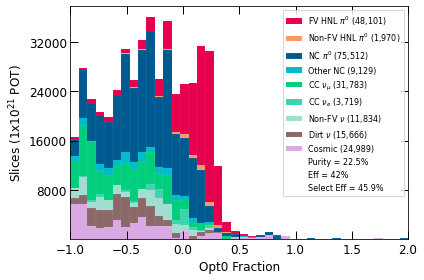

In [55]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE = -0.02
Purity = 60.4
Eff = 36.3
Purity - Start Purity = 37.9
Eff - Start Eff = -9.6
-------------------------------------
Best Cut Score P = 0.16
Purity = 70.5
Eff =  24
Purity - Start Purity =  48
Eff - Start Eff = -21.9


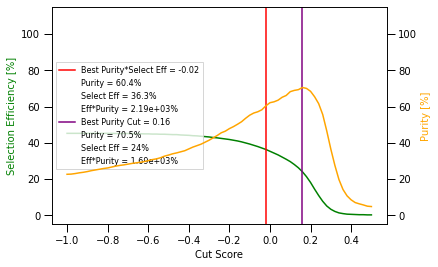

In [56]:
if ifTune:
    vary_OpT0FracMore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_tuning.png", dpi =200)

-------------------------------------
Best Cut Score PE = 0.54
Purity =  23
Eff = 45.1
Purity - Start Purity = 0.5
Eff - Start Eff = -0.8
-------------------------------------
Best Cut Score P = 0.42
Purity =  23
Eff = 44.9
Purity - Start Purity = 0.5
Eff - Start Eff =  -1


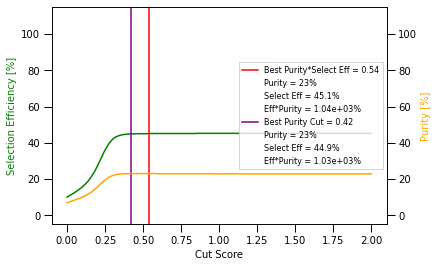

In [57]:
if ifTune:
    vary_OpT0FracLess(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_less_tuning.png", dpi =200)

<h3> Split 1 and 2+ shower cases </h3>

In [58]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> 1 shower cases </h3>

<Figure size 432x288 with 0 Axes>

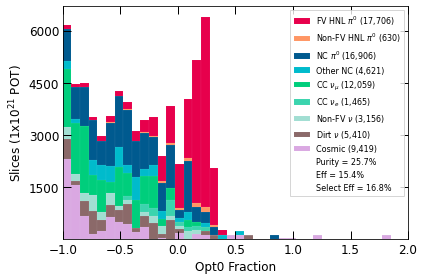

In [59]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_one_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE = -0.12
Purity = 62.2
Eff = 14.8
Purity - Start Purity = 36.5
Eff - Start Eff =  -2
-------------------------------------
Best Cut Score P = 0.16
Purity = 76.2
Eff = 9.4
Purity - Start Purity = 50.5
Eff - Start Eff = -7.4


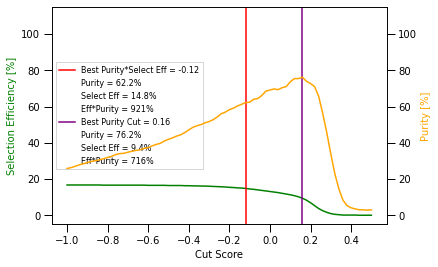

In [60]:
if ifTune:
    vary_OpT0FracMore(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_one_shw_tuning.png", dpi =200)

-------------------------------------
Best Cut Score PE = 0.4
Purity = 26.4
Eff = 16.6
Purity - Start Purity = 0.7
Eff - Start Eff = -0.2
-------------------------------------
Best Cut Score P = 0.4
Purity = 26.4
Eff = 16.6
Purity - Start Purity = 0.7
Eff - Start Eff = -0.2


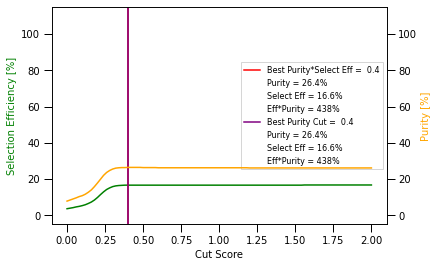

In [61]:
if ifTune:
    vary_OpT0FracLess(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_less_one_shw_tuning.png", dpi =200)

<h3> 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

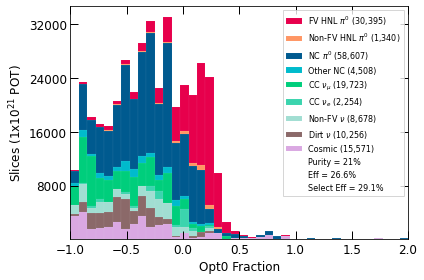

In [62]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_two_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE = 8.88178e-16
Purity = 58.6
Eff = 22.2
Purity - Start Purity = 37.6
Eff - Start Eff = -6.9
-------------------------------------
Best Cut Score P = 0.18
Purity = 67.8
Eff =  13
Purity - Start Purity = 46.8
Eff - Start Eff = -16.1


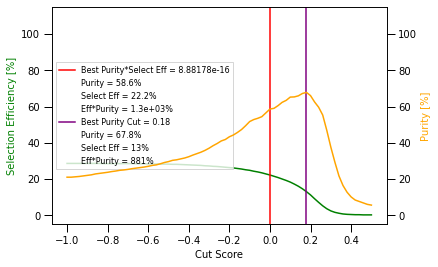

In [63]:
if ifTune:
    vary_OpT0FracMore(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_two_shw_tuning.png", dpi =200)

-------------------------------------
Best Cut Score PE = 0.6
Purity = 21.4
Eff = 28.5
Purity - Start Purity = 0.4
Eff - Start Eff = -0.6
-------------------------------------
Best Cut Score P = 0.42
Purity = 21.4
Eff = 28.3
Purity - Start Purity = 0.4
Eff - Start Eff = -0.8


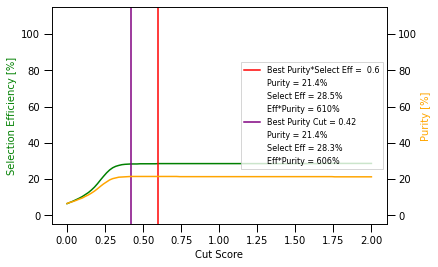

In [64]:
if ifTune:
    vary_OpT0FracLess(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_less_two_shw_tuning.png", dpi =200)

<h3> Apply Cut </h3>

<h3> 1 shower only: harsh cut</h3>

In [65]:
#fracMore = TuneCut['Opt0FracMore']
fracMore = -0.12
print(fracMore)
fracLess = 0.6
print(fracLess)

if ifCut:
    df_hnl_shw1 = cutOpt0Frac(df_hnl_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_nu_shw1 = cutOpt0Frac(df_nu_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_cos_shw1 = cutOpt0Frac(df_cos_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)

-0.12
0.6


<h3> 2+ showers: cut on primary + less harsh cut </h3>

In [66]:
#fracMore = TuneCut['Opt0FracMore']
fracMore = 0
print(fracMore)
fracLess = 0.6
print(fracLess)

if ifCut:
    df_hnl_shw2 = cutOpt0Frac(df_hnl_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_nu_shw2 = cutOpt0Frac(df_nu_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_cos_shw2 = cutOpt0Frac(df_cos_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)

0
0.6


In [67]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)

df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)

df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [68]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Opt0 Fraction")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1, 1.3, 6.8, 19.5, 22.5, 63.9]
[99.4, 91.5, 66.0, 50.8, 47.9, 45.9, 36.8]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction']


<Figure size 432x288 with 0 Axes>

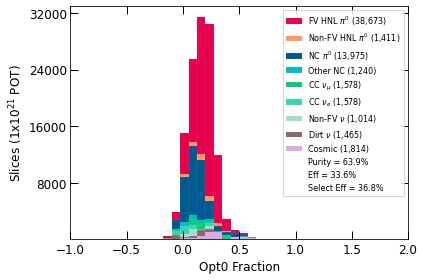

In [69]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    scaleHNLPlot,
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_postcut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Make Beam Bucket - Post Opt0 Frac</h1>

<Figure size 432x288 with 0 Axes>

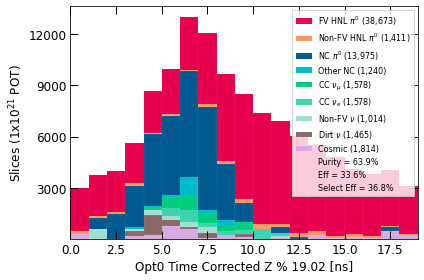

In [70]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postopt0.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Shower Theta</h1>

<h3> Get Primary Shower </h3>

In [71]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Showers of both 1 and 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

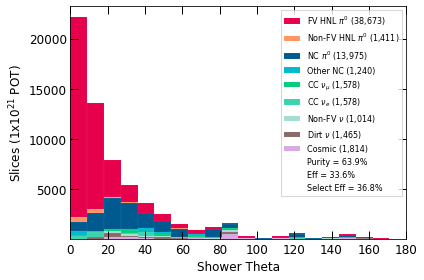

In [72]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


-------------------------------------
Best Cut Score PE = 24.4
Purity =  82
Eff = 31.5
Purity - Start Purity = 18.1
Eff - Start Eff = -5.3
-------------------------------------
Best Cut Score P =   6
Purity = 94.9
Eff = 11.7
Purity - Start Purity =  31
Eff - Start Eff = -25.1


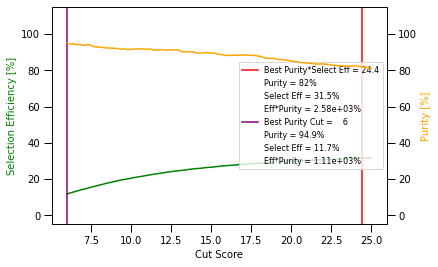

In [73]:
if ifTune:
    vary_Theta(df_hnl_prim, df_nu_prim, df_cos_prim, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/prim_shower_theta_tuning.png", dpi =200)

<h3> Split 1 and 2+ shower cases </h3>

In [74]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> Primary Showers of 1 shower cases </h3>

<Figure size 432x288 with 0 Axes>

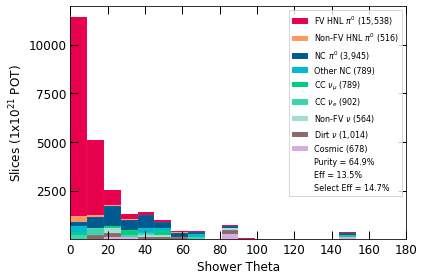

In [75]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


-------------------------------------
Best Cut Score PE = 24.2
Purity = 83.8
Eff = 13.9
Purity - Start Purity = 18.9
Eff - Start Eff = -0.8
-------------------------------------
Best Cut Score P = 6.4
Purity =  93
Eff = 6.8
Purity - Start Purity = 28.1
Eff - Start Eff = -7.9


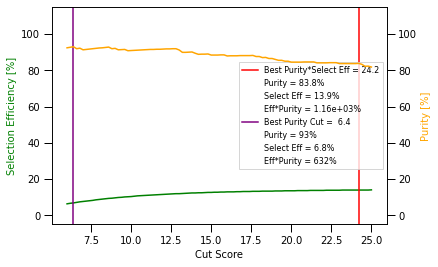

In [76]:
if ifTune:
    vary_Theta(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/one_shower_theta_tuning.png", dpi =200)

<h3> All Showers of 2+ shower cases </h3>

In [77]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

<Figure size 432x288 with 0 Axes>

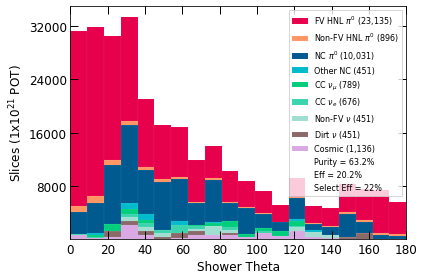

In [78]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


-------------------------------------
Best Cut Score PE =  24
Purity = 78.9
Eff = 18.5
Purity - Start Purity = 15.7
Eff - Start Eff = -3.5
-------------------------------------
Best Cut Score P = 7.4
Purity = 91.1
Eff = 7.6
Purity - Start Purity = 27.9
Eff - Start Eff = -14.4


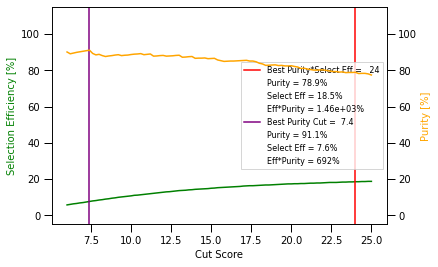

In [79]:
if ifTune:
    vary_Theta(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/two_shower_theta_tuning.png", dpi =200)

<h3> Primary Showers of 2+ shower cases </h3>

In [80]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)

<Figure size 432x288 with 0 Axes>

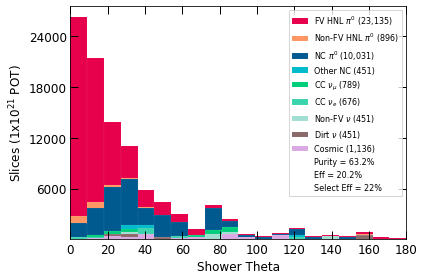

In [81]:
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_primary_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


-------------------------------------
Best Cut Score PE = 24.6
Purity = 81.1
Eff = 17.6
Purity - Start Purity = 17.9
Eff - Start Eff = -4.4
-------------------------------------
Best Cut Score P =   6
Purity = 98.1
Eff = 5.4
Purity - Start Purity = 34.9
Eff - Start Eff = -16.6


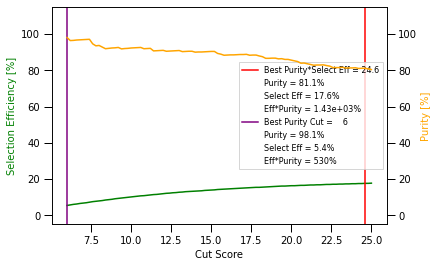

In [82]:
if ifTune:
    vary_Theta(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/two_shower_prim_theta_tuning.png", dpi =200)

<h3>Apply Cut</h3>

<h3> 1 shower only: harsh cut</h3>

In [83]:
#angle = TuneCut['OneShowerTheta']
angle = 24
print(angle)

if ifCut:
    df_hnl_shw1 = cutThetaAngle(df_hnl_shw1, thetaAngle = angle) 
    df_nu_shw1 = cutThetaAngle(df_nu_shw1, thetaAngle = angle) 
    df_cos_shw1 = cutThetaAngle(df_cos_shw1, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

24


<h3> 2+ showers: cut on primary + less harsh cut </h3>

In [84]:
#angle = TuneCut['TwoShowerTheta']
angle = 25
print(angle)

if ifCut:
    df_hnl_prim_shw2 = cutThetaAngle(df_hnl_prim_shw2, thetaAngle = angle) 
    df_nu_prim_shw2 = cutThetaAngle(df_nu_prim_shw2, thetaAngle = angle) 
    df_cos_prim_shw2 = cutThetaAngle(df_cos_prim_shw2, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

25


In [85]:
df_hnl_shw2 = merge_df_prim(df_hnl_shw2, df_hnl_prim_shw2)

df_nu_shw2 = merge_df_prim(df_nu_shw2, df_nu_prim_shw2)

df_cos_shw2 = merge_df_prim(df_cos_shw2, df_cos_prim_shw2)

In [86]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)

df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)

df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [87]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Shower Theta Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1, 1.3, 6.8, 19.5, 22.5, 63.9, 81.8]
[99.4, 91.5, 66.0, 50.8, 47.9, 45.9, 36.8, 31.6]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction', 'Shower Theta Cut']


<h1> Make Beam Bucket - Post Shower Theta</h1>

<Figure size 432x288 with 0 Axes>

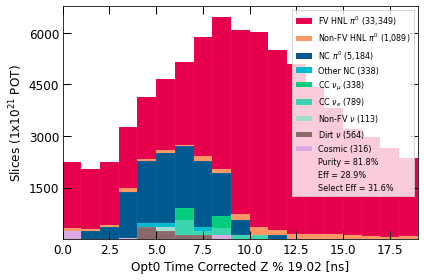

In [88]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postshowertheta.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Shower Energy and Conversion Gap</h1>

<h3> Get Primary Shower </h3>

In [89]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Showers of both 1 and 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

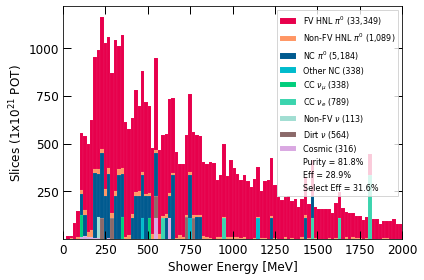

<Figure size 432x288 with 0 Axes>

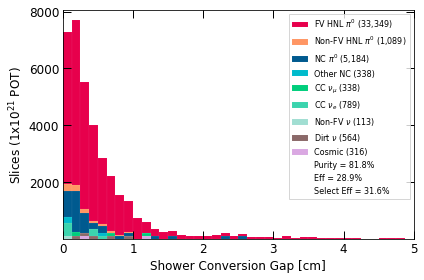

In [90]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 2000, xnbin = 100,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()
#-----------------------------------#
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE =   0
Purity = 81.8
Eff = 31.6
Purity - Start Purity =   0
Eff - Start Eff =   0
-------------------------------------
Best Cut Score P = 850
Purity = 92.7
Eff = 13.3
Purity - Start Purity = 10.9
Eff - Start Eff = -18.3


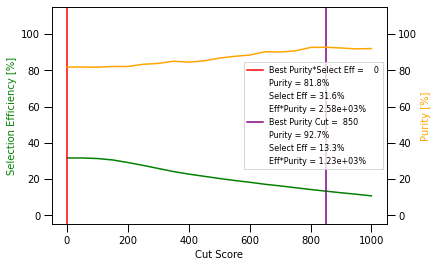

In [91]:
if ifTune:
    vary_ShowerEnergy(df_hnl_prim, df_nu_prim, df_cos_prim, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/prim_shower_energy_tuning.png", dpi =200)

<h3> Split into 1 shower and multi shower case </h3>

In [92]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> Primary Showers of 1 shower cases </h3>

<Figure size 432x288 with 0 Axes>

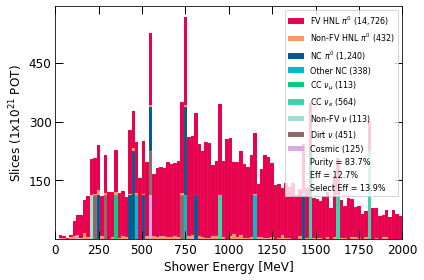

<Figure size 432x288 with 0 Axes>

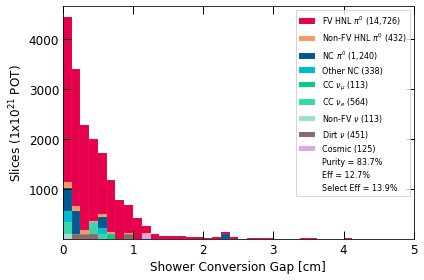

In [93]:
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 2000, xnbin = 100,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE =   0
Purity = 83.7
Eff = 13.9
Purity - Start Purity =   0
Eff - Start Eff =   0
-------------------------------------
Best Cut Score P = 850
Purity = 91.2
Eff = 8.6
Purity - Start Purity = 7.5
Eff - Start Eff = -5.3


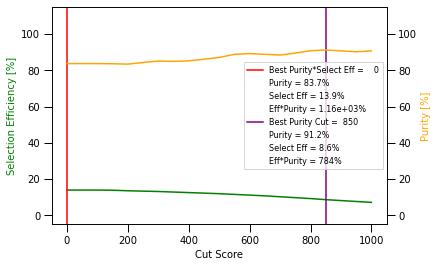

In [94]:
if ifTune:
    vary_ShowerEnergy(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/prim_one_shower_energy_tuning.png", dpi =200)

<h3> All Showers of 2+ shower cases </h3>

In [95]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
#df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

<h3> All Showers of 2+ shower cases </h3>

<Figure size 432x288 with 0 Axes>

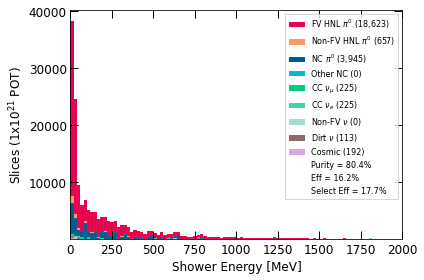

<Figure size 432x288 with 0 Axes>

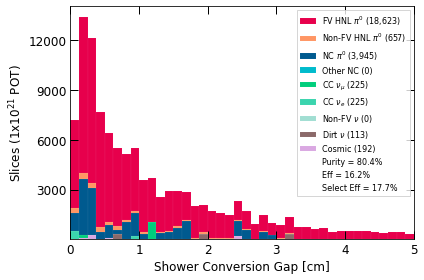

In [96]:
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 2000, xnbin = 100,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE =   0
Purity = 80.4
Eff = 17.7
Purity - Start Purity =   0
Eff - Start Eff =   0
-------------------------------------
Best Cut Score P = 800
Purity =  96
Eff = 5.1
Purity - Start Purity = 15.6
Eff - Start Eff = -12.6


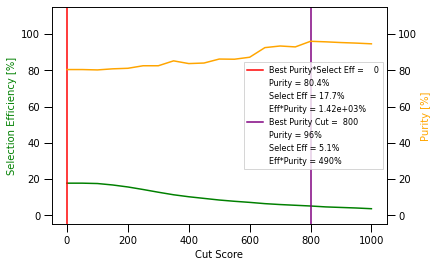

In [97]:
if ifTune:
    #vary_ShowerEnergy(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    vary_ShowerEnergy(df_hnl_shw2, df_nu_shw2, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/two_shower_energy_tuning.png", dpi =200)

<h3> Primary Showers of 2+ shower cases </h3>

In [98]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

#df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)
df_cos_prim_shw2 = get_primary_shw_df(df_cos)

<Figure size 432x288 with 0 Axes>

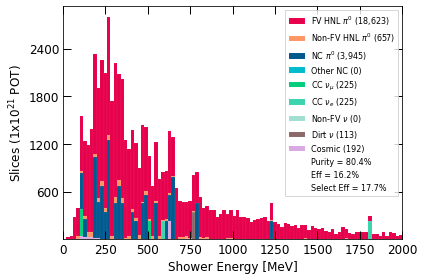

<Figure size 432x288 with 0 Axes>

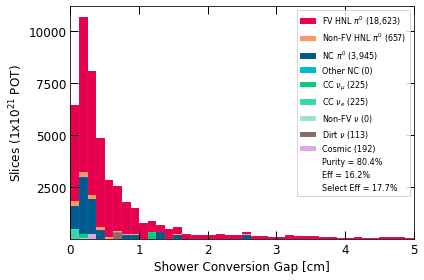

In [99]:
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 2000, xnbin = 100,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE =   0
Purity = 80.4
Eff = 17.7
Purity - Start Purity =   0
Eff - Start Eff =   0
-------------------------------------
Best Cut Score P = 800
Purity =  96
Eff = 5.1
Purity - Start Purity = 15.6
Eff - Start Eff = -12.6


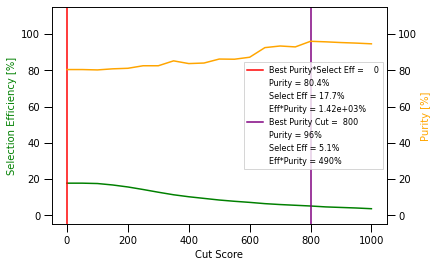

In [100]:
if ifTune:
    vary_ShowerEnergy(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/prim_two_shower_energy_tuning.png", dpi =200)

<h3>Apply Cut</h3>

<h3> 1 shower only: harsh cut</h3>

<h3> 2+ showers: cut on primary + less harsh cut </h3>

<h3>Save Purity/Eff</h3>

<h1> Make Beam Bucket - Post Shower Energy</h1>

<h1>2 Shower Case: Pi0 Mass </h1>

<h3> Split into 1 shower and multi shower case again! </h3>

In [101]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

In [102]:
df_hnl_shw2['pi0_mass'] = df_hnl_shw2.apply(lambda row: pi0mass(row), axis = 1)

df_nu_shw2['pi0_mass'] = df_nu_shw2.apply(lambda row: pi0mass(row), axis = 1)

df_cos['pi0_mass']  = ""
#df_cos_shw2['pi0_mass'] = df_cos_shw2.apply(lambda row: pi0mass(row), axis = 1)


In [103]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

#df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)
df_cos_prim_shw2 = get_primary_shw_df(df_cos)

<Figure size 432x288 with 0 Axes>

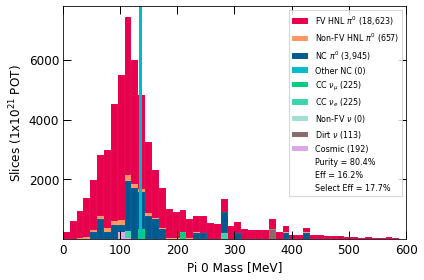

In [104]:
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos,
#plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'pi0_mass', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 600, xnbin = 50,
                    xtitle = 'Pi 0 Mass [MeV]'
            )
# only one line may be specified; full height
plt.axvline(x = 135, color = col_dict['Aqua'], linewidth = 3)

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"pizero_mass_precut.png", dpi = 200)
#-----------------------------------#

plt.show()

<h3>Apply Cut</h3>

<h3>Merge The Cut Back</h3>

<h3>Save Purity/Eff</h3>

<h1> Make Beam Bucket - Post PiZeroMass</h1>

<h1>Between Bucket Cut</h1>

<Figure size 432x288 with 0 Axes>

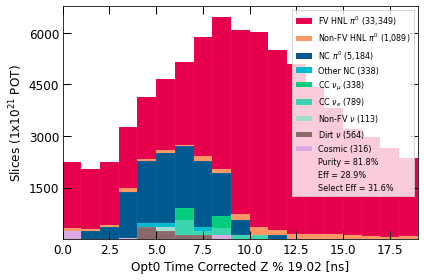

In [105]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

-------------------------------------
Best Cut Score PE =   0
Purity = 81.8
Eff = 31.6
Purity - Start Purity =   0
Eff - Start Eff =   0
-------------------------------------
Best Cut Score P =  19
Purity = 100
Eff =   0
Purity - Start Purity = 18.2
Eff - Start Eff = -31.6


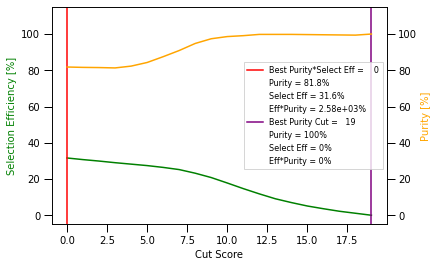

In [106]:
ifTune = True
if ifTune:
    vary_Modt(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/modt_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [107]:
df_hnl = cutModt(df_hnl, 9)
df_nu = cutModt(df_nu, 9)
df_cos = cutModt(df_cos, 9)

<h3>Save Purity/Eff</h3>

In [108]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Between Bucket")

print(purity_arr)
print(eff_arr)
print(cut_arr)

[0.4, 1.1, 1.3, 6.8, 19.5, 22.5, 63.9, 81.8, 97.4]
[99.4, 91.5, 66.0, 50.8, 47.9, 45.9, 36.8, 31.6, 20.8]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction', 'Shower Theta Cut', 'Between Bucket']


<Figure size 432x288 with 0 Axes>

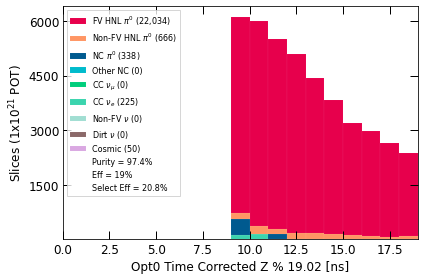

In [109]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    scaleHNLPlot,
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_final.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Plot Purity/Efficiency </h1>

In [110]:
print(eff_arr)
print(purity_arr)
print(cut_arr)

[99.4, 91.5, 66.0, 50.8, 47.9, 45.9, 36.8, 31.6, 20.8]
[0.4, 1.1, 1.3, 6.8, 19.5, 22.5, 63.9, 81.8, 97.4]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction', 'Shower Theta Cut', 'Between Bucket']


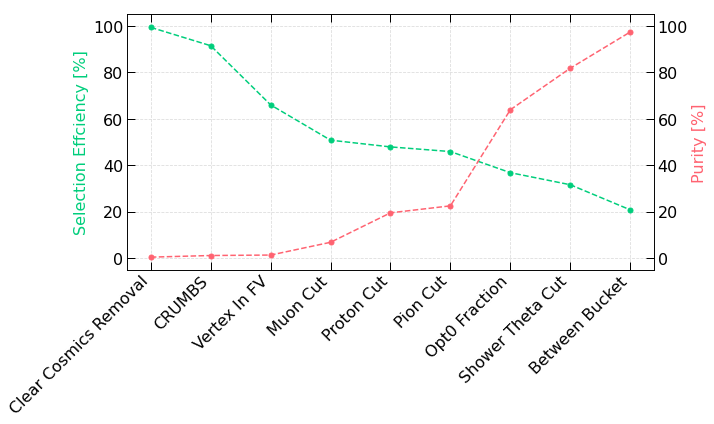

In [111]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), sharex = True)
ax2 = ax1.twinx()

t = np.arange(0, len(cut_arr) , 1)

effcol = col_dict['MintGreen']
pcol = col_dict['Flamingo']

ax1.plot(t, eff_arr, c = effcol, marker = 'o', markersize = 5, ls='--')
ax2.plot(t, purity_arr, c = pcol, marker = 'o', markersize = 5, ls='--')

ax1.set_ylim(-5,105)
ax2.set_ylim(-5,105)

ax1.grid(color='gainsboro', which='both', axis='both', linestyle='--')

ax1.set_ylabel("Selection Effciency [%]", c = effcol, fontsize = 16)
ax2.set_ylabel("Purity [%]", c = pcol, fontsize = 16)

plt.xticks(range(0, len(t)))
ax1.set_xticklabels(cut_arr, rotation = 45, ha="right", fontsize = 16)

ax1.tick_params(bottom = True, top = True, left = True, right = False)
ax2.tick_params(bottom = True, top = True, left = False, right = True)

ax1.tick_params(axis = 'x', labelsize = 16, direction = 'in')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'in')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'in')

fig.tight_layout()

#-----------------------------------#
if ifSave:
    plt.savefig(savePath+"peff.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Save Cut Dataframe to Pickle</h1>

In [112]:
df_hnl.to_pickle("./df_m240_v2_hnl.pkl", protocol = 5)

In [113]:
df_nu.to_pickle("./df_m240_v2_nu.pkl", protocol = 5)

In [114]:
df_cos.to_pickle("./df_m240_v2_cos.pkl", protocol = 5)